<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/ .kaggle

In [18]:
!cp kaggle.json ~/.kaggle/

In [19]:
!chmod 600 /root/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 425M/428M [00:22<00:00, 20.6MB/s]
100% 428M/428M [00:22<00:00, 20.3MB/s]


In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/toronto-emotional-speech-set-tess.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [41]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [44]:
len(paths)

2800

In [45]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_sad/YAF_phone_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_burn_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_long_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_doll_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_pike_sad.wav']

In [46]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [47]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,sad
1,/content/TESS Toronto emotional speech set dat...,sad
2,/content/TESS Toronto emotional speech set dat...,sad
3,/content/TESS Toronto emotional speech set dat...,sad
4,/content/TESS Toronto emotional speech set dat...,sad


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('speech').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
df['label'].value_counts()

sad        400
happy      400
angry      400
ps         400
fear       400
neutral    400
disgust    400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

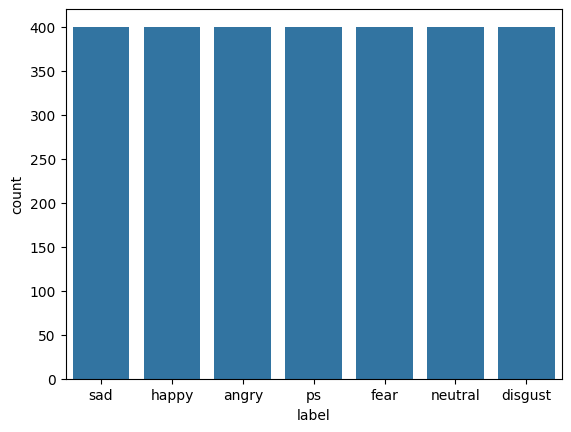

In [49]:
sns.countplot(data=df, x='label')

In [50]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

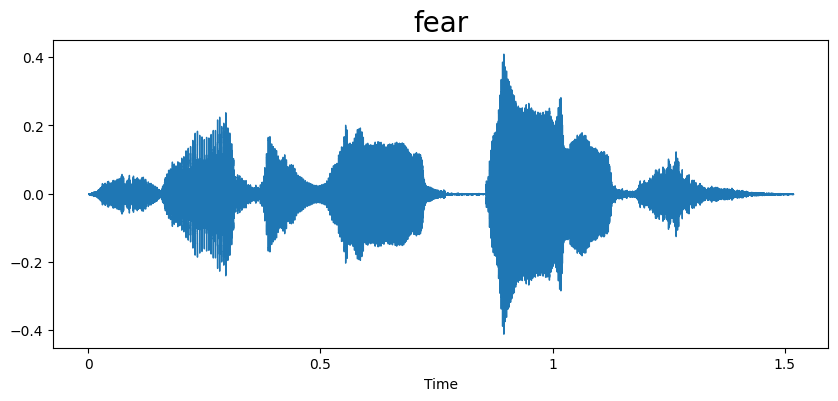

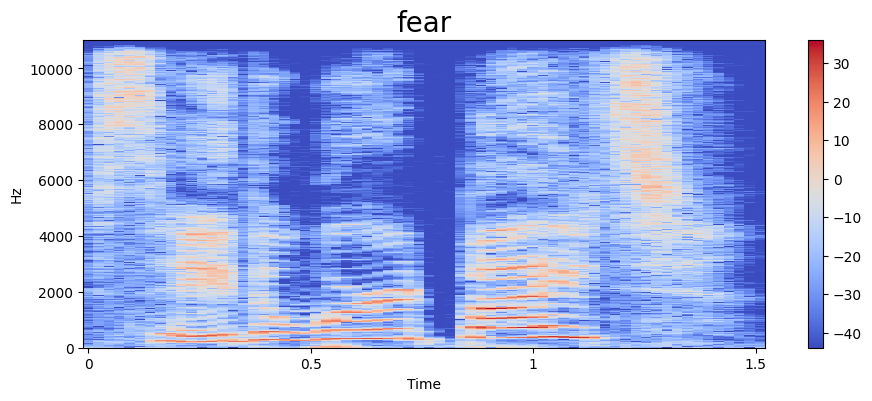

In [55]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

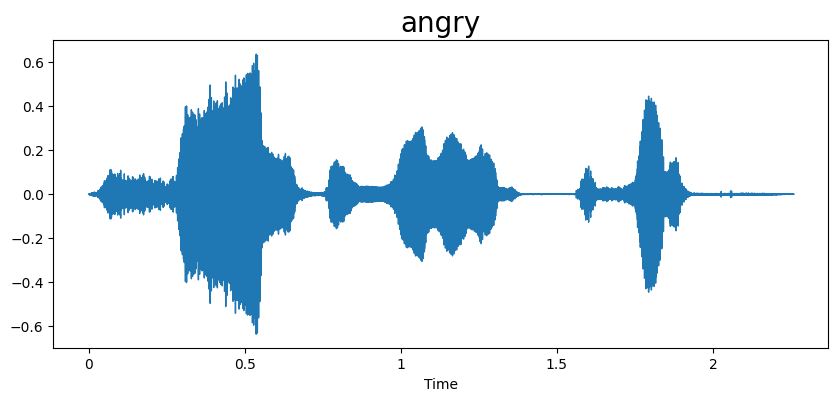

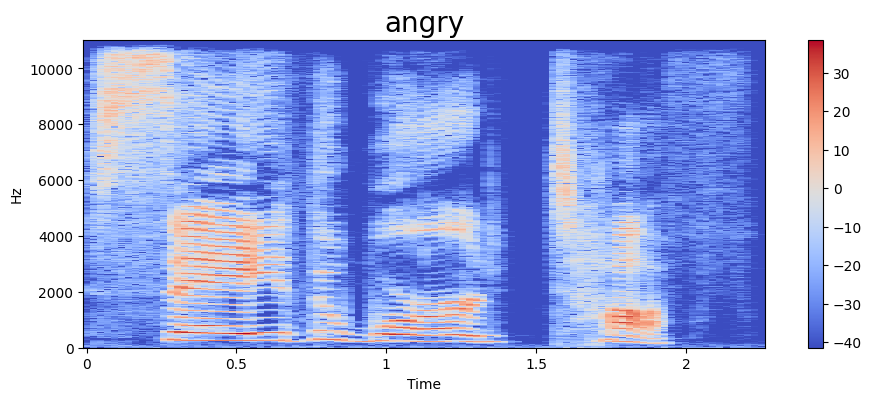

In [56]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

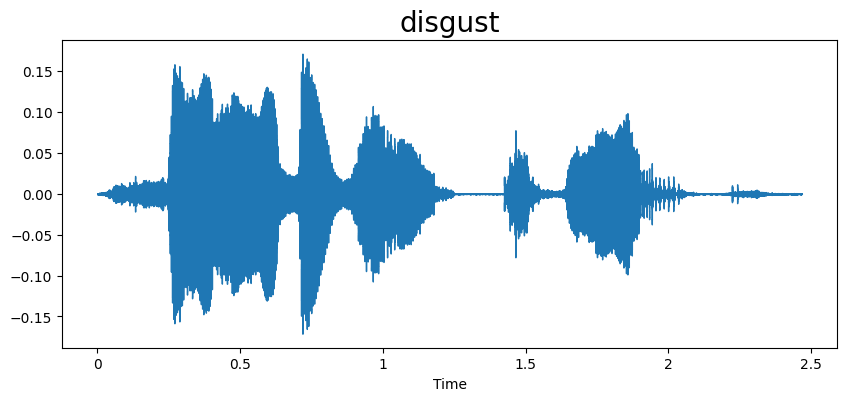

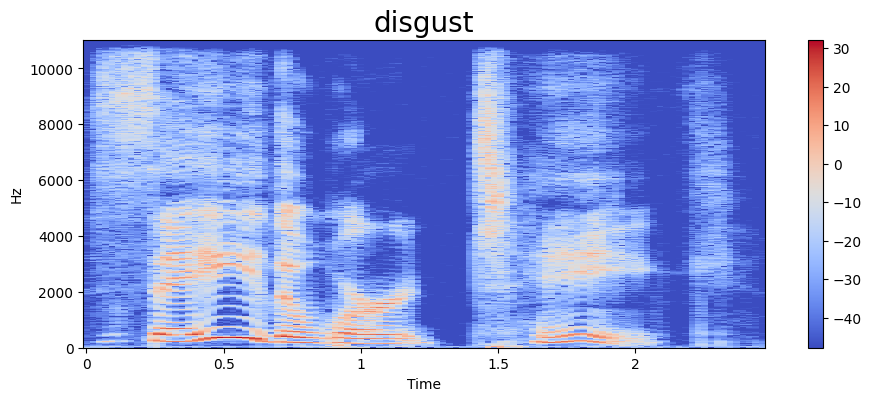

In [57]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

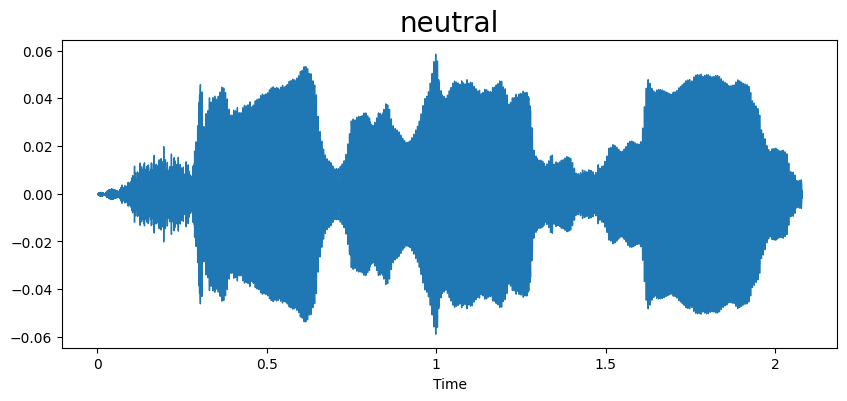

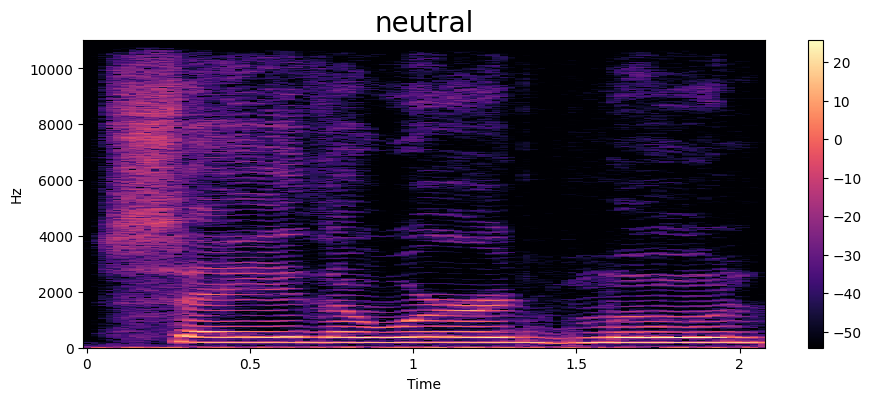

In [58]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

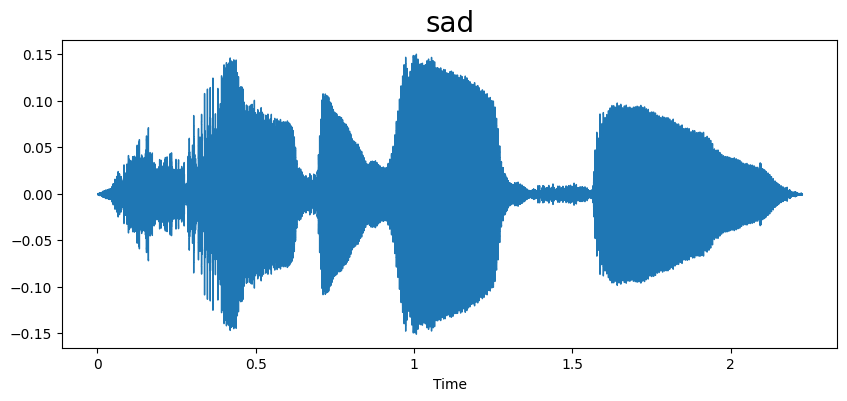

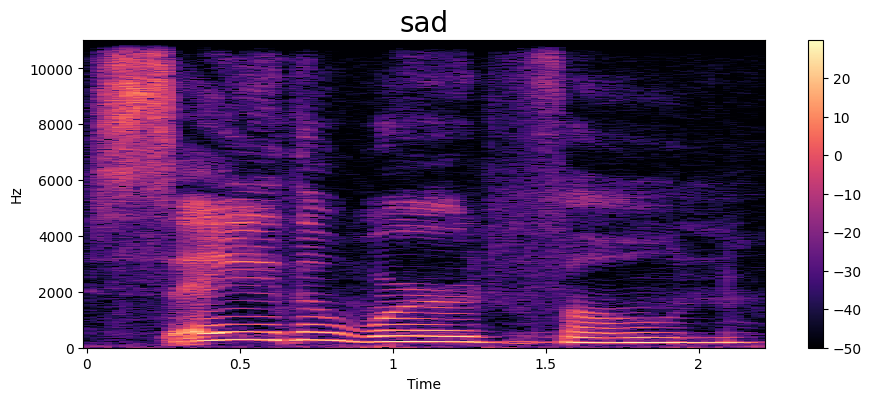

In [59]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

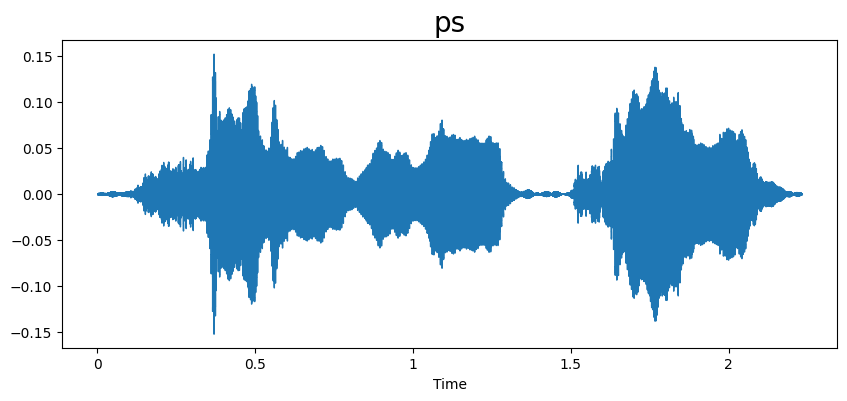

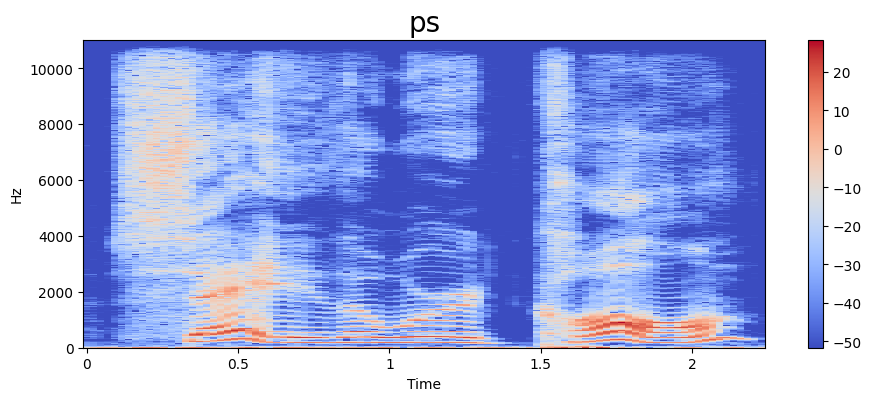

In [60]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

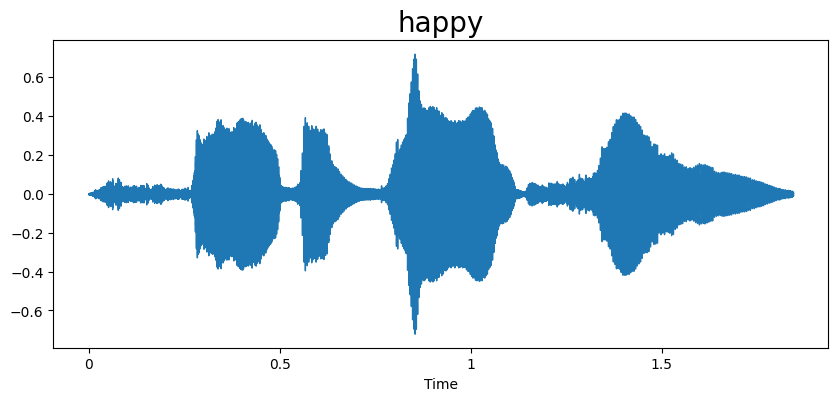

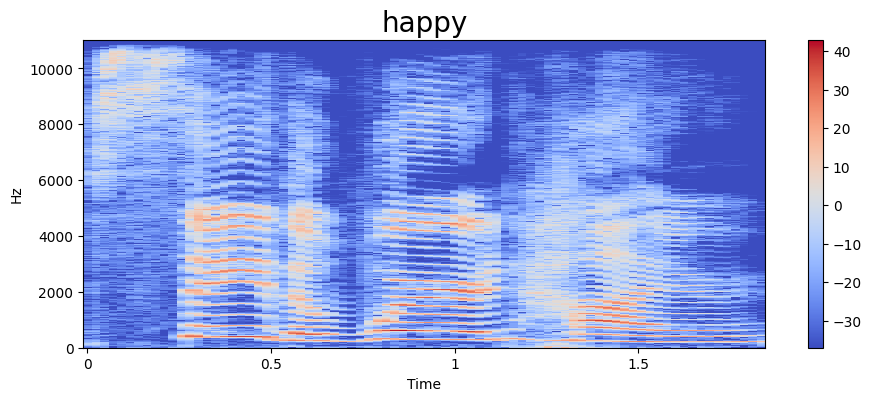

In [61]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [64]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [65]:
extract_mfcc(df['speech'][0])

array([-433.7528    ,   95.234985  ,   26.018312  ,   24.876211  ,
         -3.8615084 ,   15.295505  ,    1.2622782 ,  -19.787222  ,
         -1.2783048 ,   -9.580129  ,   -9.150954  ,   -6.981291  ,
        -10.105301  ,    5.604964  ,  -10.986035  ,   -3.231361  ,
         -4.816064  ,   -5.5032845 ,   -5.8428283 ,   -8.6317005 ,
         -9.091608  ,   -9.912967  ,   -7.505847  ,    2.712887  ,
         -3.4007602 ,    8.391322  ,   -1.446442  ,   -0.99417603,
         -5.494589  ,   -3.5474153 ,   -3.1973052 ,   11.478472  ,
          8.821817  ,   10.147406  ,    7.3802166 ,    9.496558  ,
          8.070768  ,    8.674436  ,   11.106345  ,   12.619092  ],
      dtype=float32)

In [66]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [67]:
X_mfcc

0       [-433.7528, 95.234985, 26.018312, 24.876211, -...
1       [-416.51407, 104.301476, 7.721078, 25.886946, ...
2       [-427.19934, 101.87733, 30.720917, 24.259338, ...
3       [-399.01434, 98.52447, 30.318373, 21.28183, -9...
4       [-410.08813, 90.50374, 22.003271, 36.02998, 8....
                              ...                        
2795    [-523.7277, 108.10713, 29.77991, 6.0399566, 17...
2796    [-503.61783, 94.94153, 29.157146, 3.0939023, 2...
2797    [-552.68384, 106.72335, 35.17269, 8.060722, 22...
2798    [-518.41534, 120.55453, 33.183617, 2.5353613, ...
2799    [-544.5999, 121.28504, 35.695244, 18.844347, 1...
Name: speech, Length: 2800, dtype: object

In [68]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [70]:
#input split
X = np.expand_dims(X, -1)
#new dimension is often required when dealing with neural networks
X.shape

(2800, 40, 1, 1)

In [71]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [72]:
y = y.toarray()

In [74]:
y.shape

(2800, 7)

In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [76]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 6s 24ms/step - loss: 1.1784 - accuracy: 0.5366 - val_loss: 1.1445 - val_accuracy: 0.4768
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.4238 - accuracy: 0.8438 - val_loss: 1.2227 - val_accuracy: 0.7107
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.2433 - accuracy: 0.9250 - val_loss: 2.0652 - val_accuracy: 0.6696
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 0.9518 - val_loss: 1.1821 - val_accuracy: 0.7250
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1699 - accuracy: 0.9487 - val_loss: 2.3997 - val_accuracy: 0.4893
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1241 - accuracy: 0.9638 - val_loss: 1.6732 - val_accuracy: 0.6196
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1037 - accuracy: 0.9701 - val_loss: 1.7616 - val_accuracy: 0.6482
Epoch 8/50
35/35 [=

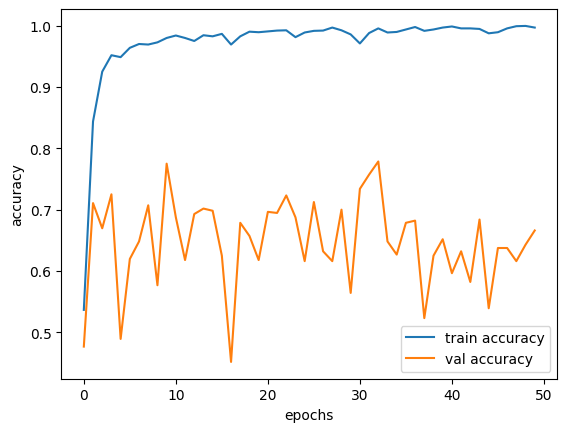

In [77]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

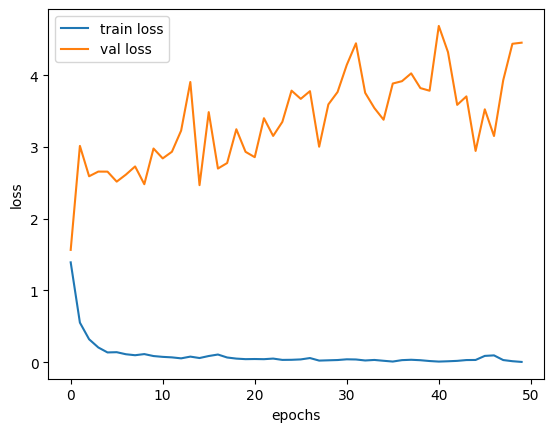

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [117]:
user_input_mfcc = extract_mfcc("/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_book_sad.wav")
user_input_mfcc = np.expand_dims(user_input_mfcc, axis=0)

In [118]:
predictions = model.predict(user_input_mfcc)

1/1 [==============================] - 0s 19ms/step


In [119]:
predicted_emotion = np.argmax(predictions)

In [120]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Plesant Surprise', 'Sad']
predicted_emotion_label = emotion_labels[predicted_emotion]
predicted_emotion_label

'Sad'